# Project 2
## Andrew Roeser
## 12/02/2023

# The Problem:
Heart disease is an all too common problem in the world today, especially in the United States, where it remains the leading cause of death for Americans. Recognizing heart disease in patients is a common struggle in the medical community, as the symptoms can vary from person to person based on particular circumstances. With the help of a few machine learning algorithms, my goal is to be able to classify the presence of heart disease in medical patients with the help of a data set found on the UCI Machine Learning Repository. This data set contains 14 features, 13 of which are characteristics/symptoms of patients and the last feature being the presence of heart disease. The particular section of the data set that I chose came from a study done in Cleveland and can be found with the link: https://archive.ics.uci.edu/dataset/45/heart+disease. 

So to sum up, my main goal for this project is to be able to determine the presence and severity of heart disease using the data set from a study done in Cleveland.


# Importing Libraries/Data:

To start out, I first need to import some libraries that will help me plot my data, wrangle it, and use machine learning techniques for predictions.

In [488]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Next, I need to import my data, which did not come with labeled columns so I also need to create labels for the columns and add this onto the set

In [489]:
data = pd.read_csv("processed.cleveland.data")

In [490]:
names = pd.array(['Age', 'Sex', "Chest Pain Type", "Resting BP", "Cholestoral", "Fasting Blood Sugar", "Resting ECG", "Max Heart Rate", "Exercise Induced Angina", "ST Depression from Exercise", "Slope of Peak Exercise ST", "Number of Vessels Colored by Flourosopy", "Thal", "Diagnosis"])

In [491]:
data.columns = names

In [492]:
data

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Data Cleaning and Exploration:

In [493]:
data.head()

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [494]:
data.tail()

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [495]:
data.describe()

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Diagnosis
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Exploring the data, I can see that there are two variables that do not show up in the description table, which must mean they are not purely float values:

In [496]:
data[data["Thal"] == "?"]

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [497]:
data[data["Number of Vessels Colored by Flourosopy"] == "?"]

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


As can be seen, it appears that instead of using NA values, the data set used "?" to represent missing values, so I am just going to drop these rows from the data set.

In [498]:
data = data.drop(data[data["Number of Vessels Colored by Flourosopy"] == "?"].index)

In [499]:
data.describe()

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Diagnosis
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.500000,0.674497,3.167785,131.624161,247.147651,0.144295,0.993289,149.503356,0.328859,1.047651,1.597315,0.949664
std,9.022699,0.469351,0.956302,17.718516,51.995645,0.351980,0.994914,22.993521,0.470589,1.163507,0.613204,1.233981
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.500000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.750000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [500]:
data["Number of Vessels Colored by Flourosopy"]

0      3.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
296    0.0
297    0.0
298    2.0
299    1.0
300    1.0
Name: Number of Vessels Colored by Flourosopy, Length: 298, dtype: object

The column was still not showing up in the description table, and it turns out that the data type of the column was object instead of float, so I changed that to float.

In [501]:
data["Number of Vessels Colored by Flourosopy"] = data["Number of Vessels Colored by Flourosopy"].array.astype(float)

In [502]:
data.describe()

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Diagnosis
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.500000,0.674497,3.167785,131.624161,247.147651,0.144295,0.993289,149.503356,0.328859,1.047651,1.597315,0.674497,0.949664
std,9.022699,0.469351,0.956302,17.718516,51.995645,0.351980,0.994914,22.993521,0.470589,1.163507,0.613204,0.938202,1.233981
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.500000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.750000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,4.000000


Now to do the same thing with the other column:

In [503]:
data = data.drop(data[data["Thal"] == "?"].index)

In [504]:
data["Thal"] = data["Thal"].array.astype(float)

In [505]:
data.describe()

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.513514,0.675676,3.165541,131.648649,247.398649,0.141892,0.993243,149.597973,0.327703,1.051351,1.597973,0.679054,4.726351,0.949324
std,9.051631,0.468915,0.958262,17.775956,52.078915,0.349530,0.994879,22.980401,0.470171,1.165841,0.613848,0.939726,1.940500,1.235410
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Note that the values in the diagnosis column represent the presence/severity (values 1,2,3,4) and absence (value 0) of heart disease.

Now that the data is all cleaned, I am going to get rid of some outlier values to hopefully improve my model accuracies.

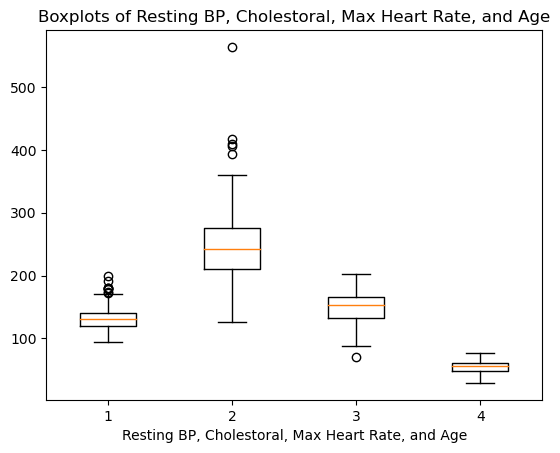

In [506]:
plt.boxplot([data["Resting BP"], data["Cholestoral"], data["Max Heart Rate"], data["Age"]])
plt.title("Boxplots of Resting BP, Cholestoral, Max Heart Rate, and Age")
plt.xlabel("Resting BP, Cholestoral, Max Heart Rate, and Age")
plt.show()

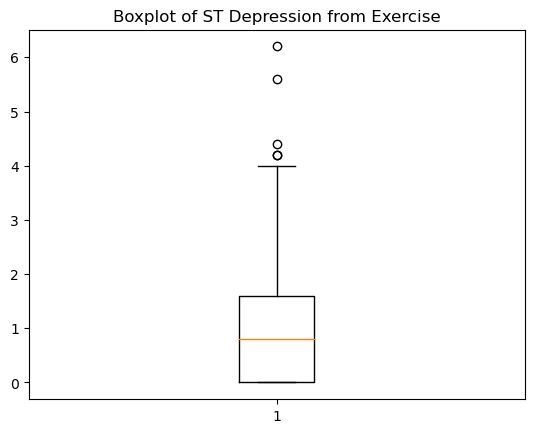

In [507]:
plt.boxplot(data["ST Depression from Exercise"])
plt.title("Boxplot of ST Depression from Exercise")
plt.show()

As can be seen with the box plots, there are a few outlier values in each of these categories which I will need to drop. The method I will use for this is to drop values that lie 1.5 times outside the range of the inter quartile range:

In [508]:
data = data[data["Resting BP"] < (140 + (140 - 120)*1.5)]
data = data[data["Cholestoral"] < (276 + (276 - 211)*1.5)]
data = data[data["Max Heart Rate"]> (133 - (166-133)*1.5)]
data = data[data["ST Depression from Exercise"] < (1.6 + 1.6*1.5)]

I am also going to normalize the data to hopefully further improve the accuracy of some of the models by subtracting each point by the mean of the column and then dividing by the standard deviation. This wll hopefully lead to each of the columns having a mean of 0 and a standard deviation of 1:

In [509]:
for i in names[:-1]:
    data[i] = (data[i] - data[i].mean())/data[i].std()


In [510]:
data.describe()

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis
count,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,272.000000
mean,-1.404106e-16,-6.530724e-18,8.000137e-17,-7.967483e-16,-2.873518e-16,-6.530724e-18,-1.567374e-16,-3.657205e-16,-4.081702e-17,-2.612289e-17,-3.265362e-17,-1.306145e-17,5.224579e-17,0.882353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.203064
min,-2.727743e+00,-1.493274e+00,-2.262190e+00,-2.359942e+00,-2.608298e+00,-3.898481e-01,-9.656751e-01,-2.701583e+00,-6.729594e-01,-9.326510e-01,-9.435461e-01,-7.160440e-01,-8.423416e-01,0.000000
25%,-7.927528e-01,-1.493274e+00,-1.549445e-01,-6.201828e-01,-7.197254e-01,-3.898481e-01,-9.656751e-01,-7.850124e-01,-6.729594e-01,-9.326510e-01,-9.435461e-01,-7.160440e-01,-8.423416e-01,0.000000
50%,1.066088e-01,6.672075e-01,-1.549445e-01,4.895533e-02,-6.791718e-02,-3.898481e-01,-9.656751e-01,1.514936e-01,-6.729594e-01,-3.348166e-01,7.449048e-01,-7.160440e-01,-8.423416e-01,0.000000
75%,6.516764e-01,6.672075e-01,8.986781e-01,7.180935e-01,6.340302e-01,-3.898481e-01,1.039391e+00,7.830907e-01,1.480511e+00,6.615741e-01,7.449048e-01,3.843174e-01,1.235816e+00,2.000000
max,2.504906e+00,6.672075e-01,8.986781e-01,2.390939e+00,2.606168e+00,2.555671e+00,1.039391e+00,2.264077e+00,1.480511e+00,2.853634e+00,2.433356e+00,2.585040e+00,1.235816e+00,4.000000


Close enough...


Looking at the correlation between the diagnosis and the other variables, there doesn't seem to be too much correlation going on, but hopefully some of our machine learning techniques will be able to pick up on some things that aren't visible to us.

In [511]:
correlation = data.corr()
correlation["Diagnosis"]

Age                                        0.217240
Sex                                        0.279098
Chest Pain Type                            0.383618
Resting BP                                 0.123879
Cholestoral                                0.060662
Fasting Blood Sugar                        0.038264
Resting ECG                                0.196255
Max Heart Rate                            -0.425028
Exercise Induced Angina                    0.383097
ST Depression from Exercise                0.461637
Slope of Peak Exercise ST                  0.346371
Number of Vessels Colored by Flourosopy    0.492158
Thal                                       0.514523
Diagnosis                                  1.000000
Name: Diagnosis, dtype: float64

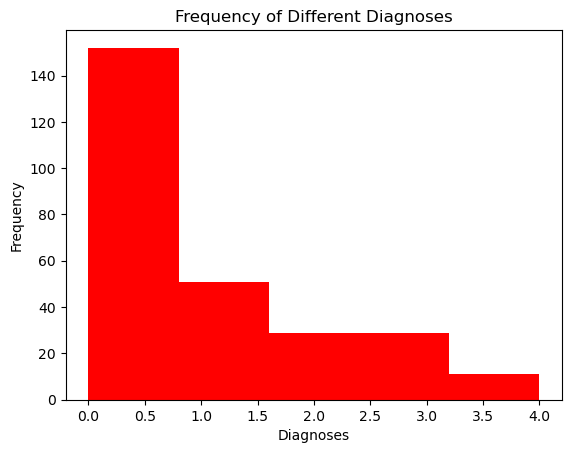

In [512]:
plt.hist(data["Diagnosis"], bins = 5, color = "r")
plt.title("Frequency of Different Diagnoses")
plt.xlabel("Diagnoses")
plt.ylabel("Frequency")
plt.show()

To cap off the data exploration, we can see that the vast majority of patients that were tested had a value of 0 for their diagnosis. AKA, they tested negative for heart disease.

# Solving the Problem:

Next, to start off the machine learning, I am going to split up my data, with the first 13 variables being the variable columns, and the last column being the output column

In [513]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [514]:
X

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal
0,1.414771,0.667207,0.898678,2.056370,0.957149,-0.389848,1.039391,-1.830414,1.480511,0.561935,0.744905,2.585040,-0.842342
1,1.414771,0.667207,0.898678,-0.620183,-0.313042,-0.389848,1.039391,-0.915688,1.480511,1.657965,0.744905,1.484679,1.235816
2,-1.855635,0.667207,-0.154944,0.048955,0.154923,-0.389848,-0.965675,1.610701,-0.672959,2.554716,2.433356,-0.716044,-0.842342
3,-1.419581,-1.493274,-1.208567,0.048955,-0.870143,-0.389848,1.039391,0.957324,-0.672959,0.462296,-0.943546,-0.716044,-0.842342
4,0.215622,0.667207,-1.208567,-0.620183,-0.157053,-0.389848,-0.965675,1.218675,-0.672959,-0.135538,-0.943546,-0.716044,-0.842342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.324636,-1.493274,0.898678,0.718093,-0.045633,-0.389848,-0.965675,-1.177038,1.480511,-0.733373,0.744905,-0.716044,1.235816
297,-0.983526,0.667207,-2.262190,-1.289321,0.466900,-0.389848,-0.965675,-0.785012,-0.672959,0.263018,0.744905,-0.716044,1.235816
298,1.523785,0.667207,0.898678,0.985749,-1.115267,2.555671,-0.965675,-0.392987,-0.672959,2.455077,0.744905,1.484679,1.235816
299,0.324636,0.667207,0.898678,0.048955,-2.496878,-0.389848,-0.965675,-1.525505,1.480511,0.263018,0.744905,0.384317,1.235816


In [515]:
y

0      2
1      1
2      0
3      0
4      0
      ..
296    1
297    1
298    2
299    3
300    1
Name: Diagnosis, Length: 272, dtype: int64

Next, in order to make sure that the models are accurate, I am going to use the train_test_split function to split up my data into 2 parts: a training section that will be used to train the model and a testing section that will test the prediction of the model.

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

The first algorithm I will be testing is linear support vector classifier (svc), which will attempt to define a hyperplane that will split up the data into the correct categories, but first I need to import it.

In [517]:
from sklearn.svm import LinearSVC

In the next code chunk, I define the model, fit the model to the training data, find the prediction of the testing data, and then calculate the mean squared error between the predicted data and the actual data.

In [518]:
model1 = LinearSVC(random_state = 1, dual = "auto" )
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
error = mean_squared_error(pred1, y_test)
np.sqrt(error)

0.9314757424772421

In [519]:
cross_val_score(model1, X_train, y_train, cv = 2)

array([0.55882353, 0.51960784])

As can be seen with the error and the cross validation score, the model is not very accurate (a little over 50%), and has a large margin of error. Looking at the plot, there doesn't appear to be any correlation between the predicted and actual outputs.

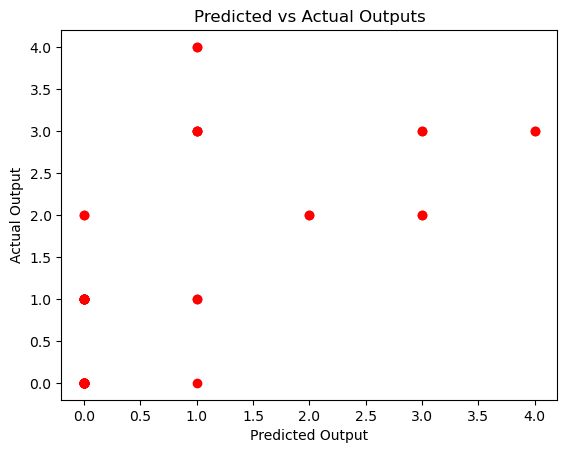

In [520]:
plt.plot(pred1, y_test, "ro")
plt.title("Predicted vs Actual Outputs")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

The next model I will try is the k-nearest neighbors classifier, which uses euclidian distance between the points to attempt to group them together.

In [521]:
from sklearn.neighbors import KNeighborsClassifier

The building and testing of this model follows the same steps as the previous one.

In [522]:
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
error = mean_squared_error(pred2, y_test)
np.sqrt(error)

1.007326105267277

In [523]:
cross_val_score(model2, X_train, y_train, cv = 2)

array([0.61764706, 0.62745098])

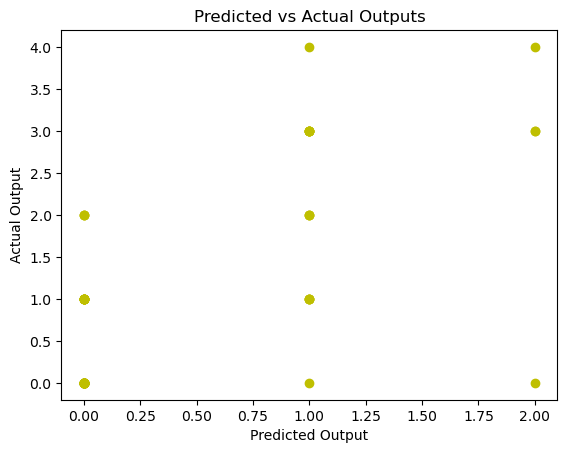

In [524]:
plt.plot(pred2, y_test, "yo")
plt.title("Predicted vs Actual Outputs")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

The results for this model are slightly better than the SVC model, however it still is not as accurate as I would hope.

The last model I will test is a Random Forest Classifier, which is a large group of decision trees.

In [525]:
from sklearn.ensemble import RandomForestClassifier

In [526]:
model3 = RandomForestClassifier(random_state = 1000)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
error = mean_squared_error(pred3, y_test)
np.sqrt(error)

0.8911327886790068

In [527]:
cross_val_score(model3, X_train, y_train, cv = 2)

array([0.55882353, 0.56862745])

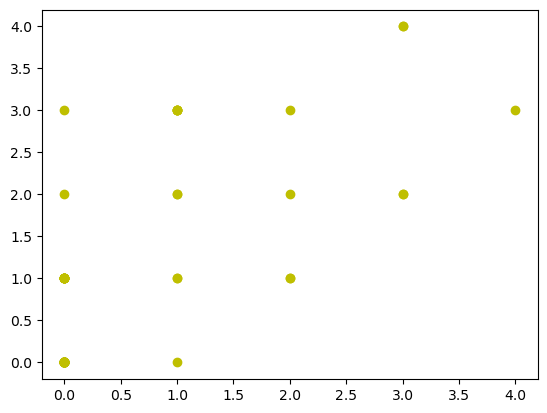

In [528]:
plt.plot(pred3, y_test, "yo")

It appears that this model was even worse than the previous ones, but does have less error.

To see what is going on with the data, I am going to plot a confusion matrix to hopefully help me get to the root of the problem

In [529]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
a = confusion_matrix(pred3, y_test)

In [530]:
b = ConfusionMatrixDisplay(a)

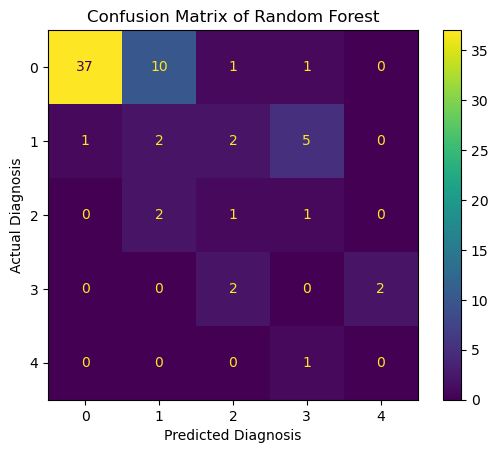

In [531]:
b.plot()
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted Diagnosis")
plt.ylabel("Actual Diagnosis")
plt.show()

We can see that the model is fairly good at predicting the presence of heart disease, but not the severity, so I am going to build one more model that can hopefully accurately predict the presence of heart disease.

In [532]:
data["binaryDiagnosis"] = 0

In [533]:
data["binaryDiagnosis"][data["Diagnosis"]>0] = 1

/var/folders/_2/hmfx065n21g0ql3h6qxf1yy00000gn/T/ipykernel_3043/3593623920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["binaryDiagnosis"][data["Diagnosis"]>0] = 1


In [534]:
data

,Age,Sex,Chest Pain Type,Resting BP,Cholestoral,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression from Exercise,Slope of Peak Exercise ST,Number of Vessels Colored by Flourosopy,Thal,Diagnosis,binaryDiagnosis
0,1.414771,0.667207,0.898678,2.056370,0.957149,-0.389848,1.039391,-1.830414,1.480511,0.561935,0.744905,2.585040,-0.842342,2,1
1,1.414771,0.667207,0.898678,-0.620183,-0.313042,-0.389848,1.039391,-0.915688,1.480511,1.657965,0.744905,1.484679,1.235816,1,1
2,-1.855635,0.667207,-0.154944,0.048955,0.154923,-0.389848,-0.965675,1.610701,-0.672959,2.554716,2.433356,-0.716044,-0.842342,0,0
3,-1.419581,-1.493274,-1.208567,0.048955,-0.870143,-0.389848,1.039391,0.957324,-0.672959,0.462296,-0.943546,-0.716044,-0.842342,0,0
4,0.215622,0.667207,-1.208567,-0.620183,-0.157053,-0.389848,-0.965675,1.218675,-0.672959,-0.135538,-0.943546,-0.716044,-0.842342,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.324636,-1.493274,0.898678,0.718093,-0.045633,-0.389848,-0.965675,-1.177038,1.480511,-0.733373,0.744905,-0.716044,1.235816,1,1
297,-0.983526,0.667207,-2.262190,-1.289321,0.466900,-0.389848,-0.965675,-0.785012,-0.672959,0.263018,0.744905,-0.716044,1.235816,1,1
298,1.523785,0.667207,0.898678,0.985749,-1.115267,2.555671,-0.965675,-0.392987,-0.672959,2.455077,0.744905,1.484679,1.235816,2,1
299,0.324636,0.667207,0.898678,0.048955,-2.496878,-0.389848,-0.965675,-1.525505,1.480511,0.263018,0.744905,0.384317,1.235816,3,1


As can be seen, I made a new column whose value is 1 when there is a presence of heart disease (diagnosis value 1, 2, 3, or 4) and a value of 0 when there is an absence of it (diagnosis value 0).

I will now change the variable and output set to reflect the new change.

In [535]:
X = data.iloc[:, :-2]
y = data.iloc[:, -1]

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

Finally, to train and test the model:

In [537]:
model4 = RandomForestClassifier(random_state = 10000)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
error = mean_squared_error(pred3, y_test)
np.sqrt(error)

0.7859052479933758

In [538]:
cross_val_score(model4, X_train, y_train, cv = 2)

array([0.82352941, 0.83333333])

In [539]:
a = confusion_matrix(pred4, y_test)

In [540]:
b = ConfusionMatrixDisplay(a)

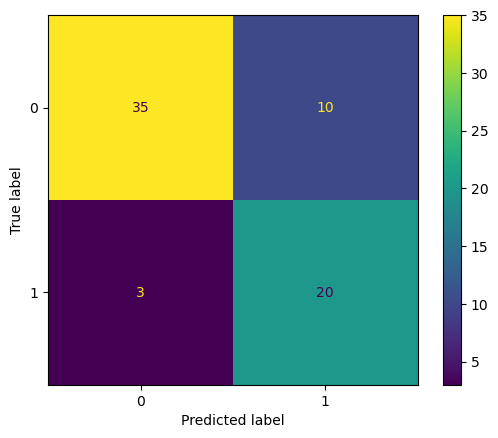

In [542]:
b.plot()
plt.show()

We can see that this model is much more accurate, with around an 80% accuracy rate and it can also be seen in the confusion chart that it rarely gives false positives, but does give out a few false positives, which isn't ideal.

## Conclusion

All in all, I did not get exactly what I wanted out of the project. The models that I was able to utilize were not great at predicting the severity of heart disease in patients. However, I was able to get a win nonetheless with a model that was able to at least predict the presence of heart disease in a patient.